In [35]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm,ttest_1samp, t, ttest_ind

# Hypothesis testing

You managed to collect a bunch of data. That's awesome. But data alone isn't that useful. It's time to use this data to produce useful insights. Hypothesis testing is a quantitative way to infer something meaningful about the distribution your data came from.

In hypothesis testing, we first define a null hypothesis $H_0$ and an alternative hypothesis $H_1$. The goal is to determine whether or not we can reject $H_0$ in favor of $H_1$. If we can reject $H_0$, we have shown that our data is consistent with $H_1$. Note that we haven't "proved" the alternative hypothesis, we have only rejected the null hypothesis. 

To determine whether or not we can reject the null hypothesis $H_0$, we will need to use a statistical hypothesis test such as the t-test. We'll also need a quantity that indicates how strong our evidence is for or against $H_0$ -- this is the p-value.

## The t-test

Formally speaking, the t-test is a statistical hypothesis test that can be used when the test statistic follows a Student's t-distribution. The t-test is often used when the test statistic would be normally distributed if the scaling term (e.g. variance) was known.

Practically speaking, the t-test is often used to test hypotheses involving the mean of a distribution. The t-test is appropriate becase the central limit theorem dictates that the mean of most distributions will be normally distributed given enough samples.
The t-test then asks, "If we assume the null hypothesis is true, what is the probability that our data, or something more extreme, could have been generated by the null hypothesis"? The resulting probability $p$, called the p-value, is then compared to a pre-defined threshold $\alpha$ which is often chosen to be 0.05. If $p<\alpha$, then we can reject the null hypothesis. 


Before we jump into the details, the idea is outlined in this image:
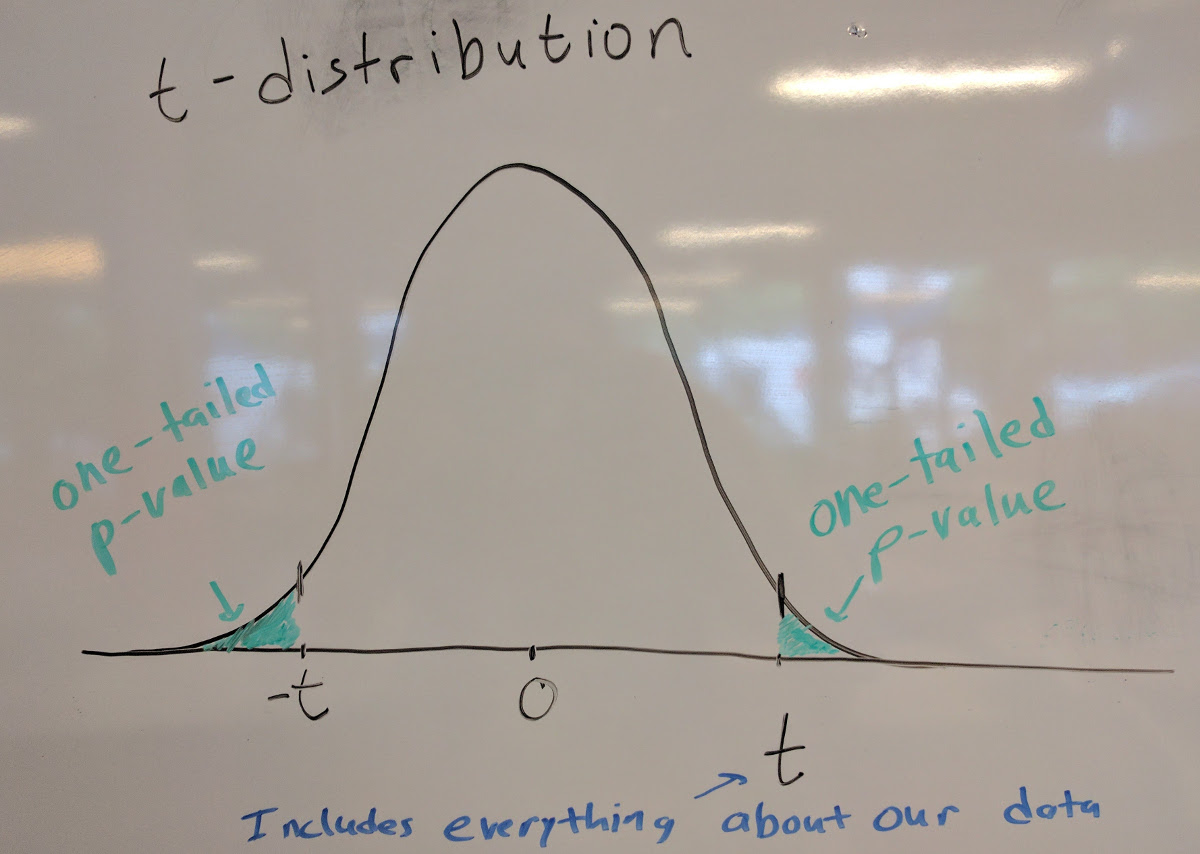
This will become more clear as we discuss the following two cases.

### One-sample t-test
The one-sample t-test lets you compare two hypotheses about one population. To use this t-test, you first transform your test statistic, e.g. the average $\bar{X}$ of your distribution, into the following form:

$$t = \frac{\bar{X}-\mu_0}{S/\sqrt{N}} $$

where $S = \sqrt{\frac{1}{N-1} \sum{(X-\bar{X})^2}}$ is the sample standard deviation, $N$ is the number of data points, and $\mu_0$ is proposed in $H_0$. Our test statistic $t$ follows a t-distribution (see below for more details) and you can find the p-value as the probability of finding a $t_{value}\geq t$ and/or $t_{value}\leq t$.

Let's give this a shot with an example.

** Example: **
It's been 100 days since the zombie outbreak hit your town. Food rations have been quite strict, and you only get 500 grams of food per day. You notice that the Mayor's son doesn't seem to be affected at all -- in fact he's gaining weight! You work out a way to measure the amount of food he's eating every day. Given the measurements below, test whether or not the Mayor's son is getting more than 500 grams of food per day on average.

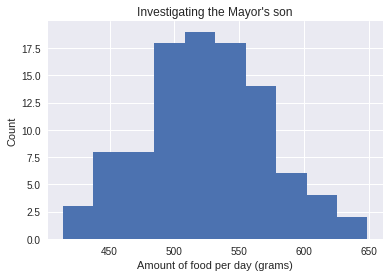

Your test statistic is 5.263147490110206
Your p-value is 4.1143022933010087e-07
You safely reject the null hypothesis.
It's clear the Mayor's son is getting special treatment.


Ttest_1sampResult(statistic=5.2631474901102058, pvalue=8.2286045878734986e-07)

In [36]:
np.random.seed(777)
# Let's first generate the measurements.
N = 100
measurements = norm(525, 50).rvs(N)
plt.hist(measurements)
plt.xlabel('Amount of food per day (grams)')
plt.ylabel('Count')
plt.title("Investigating the Mayor's son")
plt.show()

# Calculate the t-statistic.
mu_0 = 500
sd = np.std(measurements)*np.sqrt(N/(N-1))
mean = np.mean(measurements)
t_stat = (mean - mu_0)/(sd/np.sqrt(N))
print('Your test statistic is {0}'.format(t_stat))

# Convert this into the p-value.
p_value = 1-t.cdf(t_stat,N-1) # N-1 is the degrees of freedom \nu
print('Your p-value is {0}'.format(p_value))
print("You safely reject the null hypothesis.")
print("It's clear the Mayor's son is getting special treatment.")

# Note this can all be done in one line:
ttest_1samp(measurements, mu_0)
# The p-value given here is for a two-tailed test. You will
# need to divide it by 2 to get the p-value for our one-tailed test.

So what happened here? We first calculated the test statistic given our null hypothesis using the equation above. We then calculated the probability of find a test statistic $t \geq t_{value}$. This gave us the p-value, which was significantly less than $0.05$, so we safely rejected the null hypothesis. Note that, since we were only looking for $\mu>\mu_0$, this was a one-tailed test. 

### Two-sample t-test
The two-sample t-test let's you compare two populations directly. This is useful if we are interested in determining whether two different populations actually have different means. Similar to above, we perform this test by first transforming your test statistic into the following form:

$$t = \frac{\bar{X_1}-\bar{X_2}}{S_p\sqrt{\frac{1}{N_1}+\frac{1}{N_2}}} $$

where 
$$S_p = \sqrt{ \frac{(N_1-1)s_{X_1}^2 + (N_2-1)s_{X_2}^2}{N_1+N_2-2}}$$
is the pooled sample standard deviation, $X_i$ is the data from population $i$, and $N_i$ is the number of measurements in population $i$. 

** Example: **
Before you act on your new knowledge regarding the special treatment of the Mayor's son, you decide to run one more test. Perhaps the government employees serving the food are just incompetent? Your friend John has been measuring his food since day 1, so you decide to compare the measurements. Determine whether or not the Mayor's son is getting more food than John.

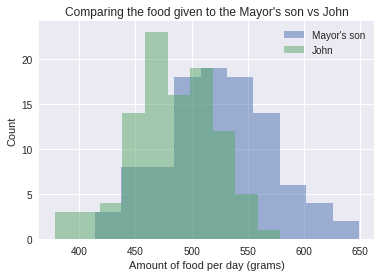

Your test statistic is 7.028782437814494
Your p-value is 1.6450174555870944e-11
You safely reject the null hypothesis.
It's clear the Mayor's son is getting special treatment. Time to take action...


Ttest_indResult(statistic=7.0287824378144936, pvalue=3.2900318302309039e-11)

In [37]:
np.random.seed(777)
# Let's first generate the measurements.
N1 = 100
N2 = 100
m_measurements = norm(525, 50).rvs(N1)
j_measurements = norm(480,40).rvs(N2)
plt.hist(m_measurements,alpha=.5,label="Mayor's son")
plt.hist(j_measurements,alpha=.5,label="John")
plt.xlabel('Amount of food per day (grams)')
plt.ylabel('Count')
plt.title("Comparing the food given to the Mayor's son vs John")
plt.legend()
plt.show()


# Calculate the t-statistic.
sd1 = np.std(m_measurements)*np.sqrt(N1/(N1-1))
mean1 = np.mean(m_measurements)
sd2 = np.std(j_measurements)*np.sqrt(N2/(N2-1))
mean2 = np.mean(j_measurements)
sdp = np.sqrt(((N1-1)*sd1**2 + (N2-1)*sd2**2)/(N1+N2-2))
t_stat = (mean1 - mean2)/(sdp*np.sqrt(1/N1+1/N2))
print('Your test statistic is {0}'.format(t_stat))

# Convert this into the p-value.
p_value = 1-t.cdf(t_stat,N1+N2-2) # N-1 is the degrees of freedom \nu
# Note: If we wanted to just see if there is a difference between the means
# we would also want to account for the case where John gets more.
# p_value += t.cdf(-t_stat,N1+N2-2) 
print('Your p-value is {0}'.format(p_value))
print("You safely reject the null hypothesis.")
print("It's clear the Mayor's son is getting special treatment. Time to take action...")

# Note this can all be done in one line:
ttest_ind(m_measurements,j_measurements)
# The p-value given here is for a two-tailed test. You will
# need to divide it by 2 to get the p-value for our one-tailed test.

In this case, we ignored the fact that the distributions have different variances. Well, it turns out that there's a t-test for this case too! Check out this [link](https://en.wikipedia.org/wiki/Welch%27s_t_test) for more details. However, to implement this approach with scipy, all you need to do is run the following command:

In [38]:
# Accounting for the different variances:
ttest_ind(m_measurements,j_measurements, equal_var = False)

Ttest_indResult(statistic=7.0287824378144936, pvalue=3.7113595956228099e-11)

## Final notes
### The t-distribution
The t-distribution $t(\nu)$ is a continous distribution that approaches a $\mathcal{N}(0,1)$ as the number of degrees of freedom, $\nu\to \infty$.  Recall that, in a one-sample t-test, we saw that $\nu=N-1$. Similarly, in a two-sample t-test, $\nu=N_1+N_2-2$. This means that, as we include more data, our t-distribution quickly approaches a normal.

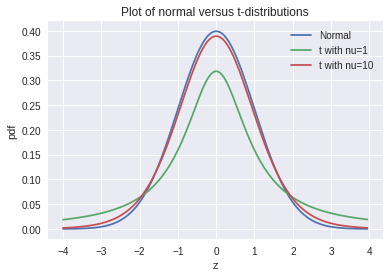

In [39]:
z = np.arange(-4,4,.05)
plt.plot(z, norm(0,1).pdf(z), label="Normal")
plt.plot(z, t.pdf(z, 1), label="t with nu=1")
plt.plot(z, t.pdf(z, 10), label="t with nu=10")
plt.xlabel("z")
plt.ylabel("pdf")
plt.title("Plot of normal versus t-distributions")
plt.legend()

Note that the t-distrbution only arises because we do not know the actual standard deviations of our samples.

### Assumptions
- Formally speaking, the t-test assumes that your data comes from a normal distribution. However, as long as the test statistic, e.g. the mean, follows a normal distribution, the t-test is considered valid. 
- The t-test assumes that all data points are independent from one another. 
- When comparing two populations, the original t-test assumes that the variances are equal. [Welsh's t-test](https://en.wikipedia.org/wiki/Welch%27s_t_test) relaxes this requirement.

### Precision and recall
In hypothesis testing, a type I error is the incorrect rejection of a true null hypothesis (i.e. a "false positive"). A type II error is incorrectly keeping a false null hypothesis that should have been rejected (i.e. a "false negative"). These ideas can be directly related to the ideas of precision and recall. Minimizing the number of type I errors is equivalent to maximizing the precision, while minimizing the number of type II errors is equivalent to maximizing the recall. 

# Bayesian posterior inference

The goal of Bayesian inference is to update our prior knowledge of a probability or probability distribution using new evidence. This is done by applying Baye's Rule.

## Bayes' Rule

Bayes' rule is a formal way of updating our prior knowledge to get a posterior distribution:

$$P(X|Y) = \frac{P(Y|X) P(X)}{P(Y)}  $$

Here, the 4 terms are:
- the posterior distribution $P(X|Y)$ -- the probability or probability distribution of X after updating our knowledge.
- the prior distribution $P(X)$ -- our previous knowledge of X.
- the likelihood $P(X|Y)$ -- the likelihood of observing X given our prior knowledge.
- the marginal likelihood $P(Y)$ -- the probability of Y. This term is typically found by summing/integrating over all possibilities, e.g. $P(Y) = P(Y|X)P(X) + P(Y|\text{not } X)P(\text{not } X) $.

### Example - A common interview question

In a zombie apacolypse, it's important to know who is infected and who is not. The remaining humans have devised a test that can detect a zombie infection with a true positive rate of 100%, but a false positive rate of 10%. The general concensus is that only 2% of the population is really infected. If you test positive, what is the probability you are really infected?

In [40]:
## Let's use Baye's Rule to determine our probability of really being infected:
# The prior is that 2% of the population is infected.
prior = 0.02

# If you are infected, you test positive 100% of the time. The likelihood is the 
# true positive rate
true_positive = 1.0

# The probability of testing positive depends on the probability of being infected 
# and testing positive (true_positive*prior), as well as the probability of not being 
# infected but testing positive (false_positive*(1-prior))
false_positive = 0.1
test_positive = prior*true_positive + (1-prior)*false_positive

# The final result:
infected = prior*true_positive/(test_positive)

print("Dear survivor, you have tested positive and therefore have a {}% chance of being infected.".format(round(100*infected)))

Dear survivor, you have tested positive and therefore have a 17% chance of being infected.


**Bonus question:** With your new knowledge that there's only a 17% chance you're infected, you beg and plead for your life. Despite their limited resources, the rest of the survivors offer you the test once more. If you test positive again, what is the chance that you are really infected if the tests are independent? Hint: Use our previous result as the prior.

**Answer:** You have a 67% chance of being infected.

# Posterior sampling:

In our previous example, we were able to explicitely solve for the posterior distribution. While it's often quite easy to calculate the numerator $P(Y|X) P(X)$, calculating the denominator $P(Y)$ can be difficult. In these situations, we can instead sample the posterior distribution using some clever tricks. 

## Markov Chain Monte Carlo (MCMC) sampling:

Since we can't calculate the posterior distribution, we have decided to sample it. But since we don't know the distribution in the first place, how can we sample it? This is where MCMC sampling comes in.

MCMC sampling takes advantage of the fact of the ratio of two different points on the posterior distibution $P(X|Y)$ are independent of the denominator:

$$ \frac{P(x_1|Y)}{P(x_2|Y)} = \frac{P(Y|x_1)P(x_1)}{P(Y)}\frac{P(Y)}{P(Y|x_2)P(x_2)}  = \frac{P(Y|x_1)P(x_1)}{P(Y|x_2)P(x_2)}$$

We now have a ratio in terms of only $P(Y|X)P(X)$, which we can almost always calculate. 

A good source on MCMC sampling can be found [here](http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/).

### The algorithm:
#### The gist:
Randomly walk along the posterior distribution in a manner where you are more likely to move to a position with higher likelihood. Together, the points along this walk approximate the posterior distribution. This is briefly outlined in the image below.
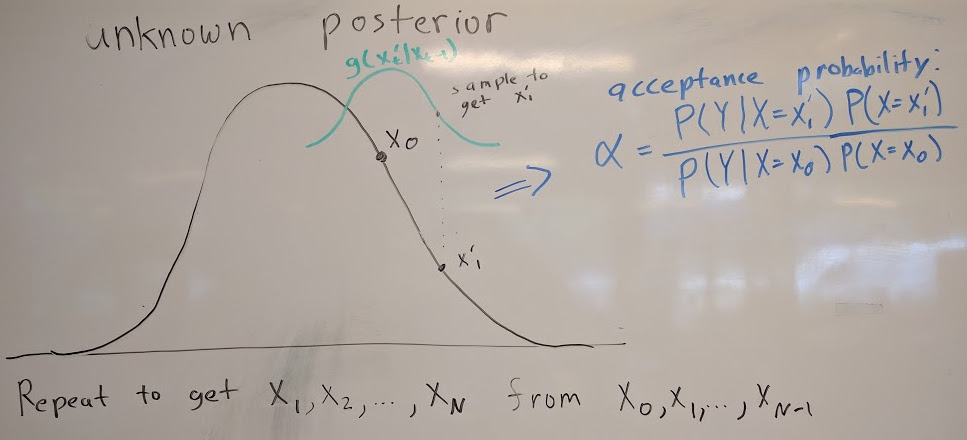

#### Setup steps:
1. Pick an arbitrary starting point $x_0$ as your starting point.
2. Choose an arbitrary probability density $g(x_{t}'|x_{t-1})$ that suggests the next point $x_{t}'$ on the posterior distribution to consider. $g(x_{t}'|x_{t-1})$ must be symmetric and is often chosen as a Gaussian centered on $x_{t-1}$. 

#### Iterative steps:
3. Given the previous $x_{t-1}$, generate a new point $x_{t}'$ from $g(x_{t}'|x_{t-1})$ to consider. 
4. Calculate the acceptance ratio $\alpha = \frac{P(x_t'|Y)}{P(x_{t-1}'|Y)}$. Note that this is the ratio we looked at earlier. 
5. If $\alpha>1$, accept the move and $x_t = x_t'$. If $\alpha<1$, accept the move with probability $\alpha$. If this move is accepted, the next step is $x_t = x_t'$, otherwise the step is rejected and $x_t = x_{t-1}$.
6. Repeat this process until you have collected a sufficient number of samples

### Example - MCMC sampling with code

During the zombie apocalypse, the survivors must acquire food by leaving the safehouse and facing the zombies. Each survivor tracks the number of zombies they killed on their trip outside of the safehouse. Our goal is to determine the (distribution of the) mean number of zombies killed per survivor (partial credit allowed for limb loss). 

You look at the results of 20 survivors on their most recent trip...

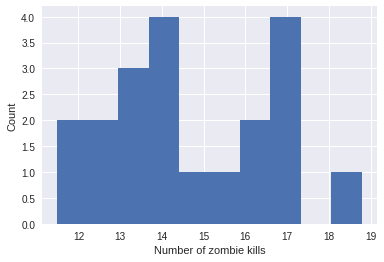

In [41]:
np.random.seed(777)
# Collect 20 samples from the real distribution
data = norm(15, 2).rvs(20)

# Plot it
plt.hist(data)
plt.xlabel("Number of zombie kills")
plt.ylabel("Count")

Before these measurements, your previous data led you to have the prior belief that the average number of zombie kills was $\mathcal{N}(\mu_0 = 14,\sigma_0^2=4)$. We need to update this prior with our new data. Let's implement MCMC sampling to sample the resulting posterior distribution. For simplicity, we'll assume we know the standard deviation.

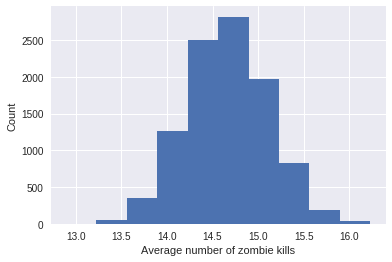

Posterior average: 14.660747437236196
Posterior standard deviation: 0.4451383509610907


In [42]:
mu_prior_mu = 14
mu_prior_sd = 2
known_sd = 2

## SETUP STEPS:
# For our case, the variable x we are trying to determine is the mean
# of the distribution. We'll start by choosing some arbitrary mu.
mu_current = 13
# In order to choose a new point, we need to choose a sampling distribution.
# We'll choose a guassian centered on the current mu, with a variance of 1.
proposal_width = 1
# Initialize a list to save our points in.
all_samples = []

## ITERATIVE STEPS:
N_samples = 10000
for i in range(N_samples):
    # Choose a new potential mu.
    mu_proposal = norm(mu_current, proposal_width).rvs()

    # Calculate the likelihoods.
    likelihood_current = norm(mu_current, known_sd).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, known_sd).pdf(data).prod()
    # Calculate the prior probabilities.
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    # Calculate the nominators of the posteriors.
    p_current = likelihood_current * prior_current
    p_proposal = likelihood_proposal * prior_proposal
    # Calculate the acceptance ratio:
    p_accept = p_proposal / p_current

    # Accept or reject the move:
    accept = np.random.rand() < p_accept
    if accept:
        mu_current = mu_proposal
    all_samples.append(mu_current)

## Plot and print the results
plt.hist(all_samples)
plt.xlabel('Average number of zombie kills')
plt.ylabel('Count')
plt.show()
posterior_mu = np.mean(all_samples)
posterior_sd = np.std(all_samples)
print('Posterior average: {0}'.format(posterior_mu))
print('Posterior standard deviation: {0}'.format(posterior_sd))

## Conjugate Priors

If the posterior distribution $P(X|Y)$ and the prior distribution $P(X)$ belong to the same family (e.g. both are Guassian), these distributions are called conjugate distributions. Conjugate distributions have a nice property -- updating the prior distribution often follows a simple analytical formula. However, this updating process requires that the likelihood function take a specific form. For example, updating a Guassian prior with data from a Gaussian likelihood function will yield a Guassian posterior function. A full list of conjugate priors can be found on [Wikipedia](https://en.wikipedia.org/wiki/Conjugate_prior).

In the above example, we updated our Gaussian prior. Did you notice anything interesting about the resulting posterior distribution? It's also a Gaussian! Let's find this analytical solution and compare the result to the simulation above.

### Example - Updating a normally distributed prior

In our previous example, we had the prior belief that the average number of zombie kills was normally distributed as $\mu \sim \mathcal{N}(\mu_0,\sigma_0^2)$. If we know that the data comes from a normal distribution with a known $\sigma$, an analytical solution for the posterior distribution can be [derived](http://www.ams.sunysb.edu/~zhu/ams571/Bayesian_Normal.pdf). 

In this case, the posterior distribution is $\mu \sim \mathcal{N}(\mu_{post},\sigma_{post}^2)$ with:
$$\mu_{post} = \frac{\left(\sigma_0^{-2}\mu_0+\sigma^{-2}\sum_{i=1}^{N}y_i\right)}
{\left(\sigma_0^{-2}+\sigma^{-2}N\right)} $$
$$ \sigma_{post} = \left(\sigma_0^{-2}+\sigma^{-2}N\right)^{-\frac{1}{2}} $$
where the $y_i$'s are the $N$ new data points you are using to update the proir. 

Let's give this a try. We can compare this solution to our MCMC simulation!

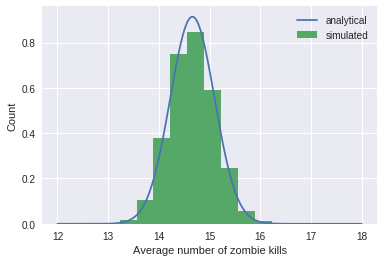

Posterior average: 14.660805416312545
Posterior standard deviation: 0.4364357804719848


In [43]:
def calc_posterior_normal(data, x, mu_0, sigma_0):
    sigma = 2
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = np.sqrt(1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, sigma_post).pdf(x),mu_post,sigma_post

x = np.linspace(12, 18, 500)
posterior_analytical,mu_post,sigma_post = calc_posterior_normal(data, x, 14., 2.)
plt.plot(x,posterior_analytical,label='analytical')
plt.xlabel('Average number of zombie kills')
plt.ylabel('Count')
plt.hist(all_samples,normed=True,label='simulated')
plt.legend()
plt.show()
print('Posterior average: {0}'.format(mu_post))
print('Posterior standard deviation: {0}'.format(sigma_post))

## Bayesian hypothesis testing


### The Bayes factor
One method of Bayesian hypothesis testing replaces the p-value with the Bayes factor $K$. The Bayes factor is the ratio of the evidence (likelihood) for two different hypotheses $H_1$ and $H_2$:

$$ K = \frac{P(Y|H_1)}{P(Y|H_2)}. $$

As we can see, larger values of $K$ idicate stronger evidence for $H_1$ over $H_2$. [Wikipedia](https://en.wikipedia.org/wiki/Bayes_factor) has a helpful chart for intepretting $K$, but the general idea is that if $K>10$, there is "strong" evidence for $H_1$, and if $K>100$, there is "decisive" evidence for $H_1$.

** Example: **
Consider our zombie kill data from before. Let's calculate the Bayes factor for comparing two hypotheses: $\mu_1=15$ kills vs. $\mu_2=13$ kills.  

In [44]:
# Parameters
mu_1 = 15
mu_2 = 13
sd = 2

# Calculate the Bayes factor
likelihood_1 = norm(mu_1, sd).pdf(data).prod()
likelihood_2 = norm(mu_2, sd).pdf(data).prod()
bayes_factor = likelihood_1/likelihood_2

print('The Bayes factor for 15 kills vs. 13 kills is {0}'.format(int(bayes_factor)))
print('This is decisive evidence in favor of Hypothesis 1.')

The Bayes factor for 15 kills vs. 13 kills is 1031
This is decisive evidence in favor of Hypothesis 1.


** Bonus: ** Is our prior belief that the average number of zombie kills is 14 distinguishable from $H_1$?

### Bayesian credible interval
An alternative to hypothesis testing in Bayesian statistics is to calculate the credible interval. The credible interval is essentially a confidence interval calculated from our posterior distribution. 

** Example: **
Consider our zombie kill data from before. What is the 95% confidence interval for $\mu$?

In [51]:
# Let's use our previous solution for the posterior distribution:
posterior = norm(mu_post,sigma_post)

# For a 95% confidence interval, we'll cut off the bottom and top 2.5% of the cdf:
post_cdf = posterior.cdf(x)
lower_idx = [idx for idx,x in enumerate (post_cdf) if x>=0.025][0]
lower = x[lower_idx]
upper_idx = [idx for idx,x in enumerate (post_cdf) if x<=(1-0.025)][-1]
upper = x[upper_idx]

print('The 95% confidence interval for the mean is ({0},{1})'.format(lower,upper))

The 95% confidence interval for the mean is (13.81563126252505,15.511022044088175)


## Final notes
### Assumptions
You may have noticed that, in the above examples, we constantly made assumptions about the underlying data:
- "The general concensus is that only 2% of the population is really infected." 
- "the prior belief that the average number of zombie kills was $\mathcal{N}(\mu_0 = 14,\sigma_0^2=4)$" 

A key assumption in Bayesian statistics is that we already have some knowledge of the underlying distribution. This knowledge is captured in our prior. A strong prior (e.g. normal distribution with small $\sigma$) will not change significantly as new data is added, while a weak prior (e.g. uniform distribution) is essentially defined by your data. 

*Copyright &copy; 2017 Christopher Pierse.  All rights reserved.*